In [88]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm as tqdm

from pathlib import Path

from matplotlib import rc
# rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
# for Palatino and other serif fonts use:
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

In [90]:
N_0 = 1
N_N = 2.2
num = 20
n_space = np.logspace(N_0, N_N, num)
n_space = list(map(int, n_space))

In [91]:
path_data = Path('../data/convergence')

### Create solver methods

In [92]:
ITERATIONS_MAX     = 1e8
ITERATIONS_RESTART = ITERATIONS_MAX
%run 2-Solver.ipynb

## Solve for the first airfoil

### NACA-0007

In [93]:
NACA = '0012'

ALPHA = 5

data_cl = []

for n in tqdm(n_space):
    
    NUM_POINTS_X = n
    %run 1-Geometry.ipynb
    
    _, cp, cl = solve(ALPHA)
    data_cl.append((n, cl))

100%|██████████| 20/20 [01:08<00:00,  3.42s/it]


In [96]:
data_df = pd.DataFrame(data_cl, columns = ['x points', 'cl'])

data_df['panels'] = (data_df['x points']-1)*2

data_df = data_df.set_index('panels')
data_df = data_df.drop('x points', axis = 1)

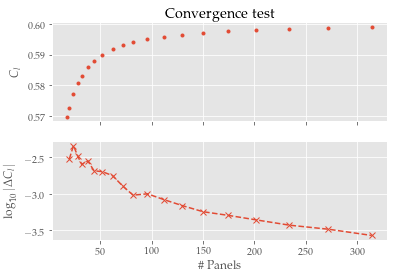

In [102]:
fig, axes = plt.subplots(nrows = 2, ncols = 1, sharex=True)

axes = axes.flatten()

data_df.plot(ax = axes[0], marker = '.', linewidth = 0.0, legend = False)

axes[0].set(title  = 'Convergence test', 
         ylabel = '$C_l$')

data_df.diff().apply(np.log10).plot(marker = 'x', 
                                    linestyle = '--', 
                                    ax = axes[1],
                                    legend = False)

axes[1].set(xlabel = '\# Panels', 
            ylabel = '$\log_{10} |\Delta C_l|$')

plt.savefig(path_data / 'convergence.png', 
            transparent = False, 
            bbox_inches = 'tight', dpi = 300)

In [104]:
data_df['absolute error'] = data_df['cl'].diff().abs()

In [107]:
data_df.to_csv(path_data / 'cl_convergence.csv')

In [110]:
print(data_df.to_latex(na_rep=''))

\begin{tabular}{lrr}
\toprule
{} &        cl &  absolute error \\
panels &           &                 \\
\midrule
18     &  0.569770 &                 \\
20     &  0.572756 &        0.002987 \\
24     &  0.577315 &        0.004559 \\
28     &  0.580634 &        0.003318 \\
32     &  0.583157 &        0.002523 \\
38     &  0.585974 &        0.002817 \\
44     &  0.588032 &        0.002058 \\
52     &  0.590035 &        0.002003 \\
62     &  0.591803 &        0.001768 \\
72     &  0.593071 &        0.001268 \\
82     &  0.594024 &        0.000953 \\
96     &  0.595019 &        0.000995 \\
112    &  0.595847 &        0.000828 \\
130    &  0.596532 &        0.000685 \\
150    &  0.597097 &        0.000566 \\
174    &  0.597602 &        0.000505 \\
202    &  0.598039 &        0.000436 \\
234    &  0.598408 &        0.000370 \\
272    &  0.598734 &        0.000325 \\
314    &  0.599001 &        0.000267 \\
\bottomrule
\end{tabular}

